In [1]:
import os
# os.chdir("..\..")
from google.colab import drive 
drive.mount('/content/drive')
%cd /content/drive/MyDrive/neural-processes-main
import torch
import numpy as np
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from models.convcnp import GridConvCNP, train_2d
import matplotlib.pyplot as plt

Mounted at /content/drive
/content/drive/MyDrive/neural-processes-main
cuda


In [2]:
trainset_mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Compose([transforms.Resize(32), transforms.ToTensor()]))
test_mnist = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.Compose([transforms.Resize(32), transforms.ToTensor()]))


In [3]:
train_mnist, val_mnist = torch.utils.data.random_split(trainset_mnist, [54000, 6000], generator=torch.Generator().manual_seed(1))

In [4]:
train_mnist_loader = DataLoader(dataset=train_mnist, shuffle=True, batch_size=32)
val_mnist_loader = DataLoader(dataset=val_mnist, shuffle=False, batch_size=32)
test_mnist_loader = DataLoader(dataset=test_mnist, shuffle=False, batch_size=32)


Using device: cuda
EPOCH 1:
  batch 100 loss: -0.41949067284353075
  batch 200 loss: -0.9569947864115238
  batch 300 loss: -1.515671231597662
  batch 400 loss: -1.507757057249546
  batch 500 loss: -1.8313532544672488
  batch 600 loss: -1.6550606615841388
  batch 700 loss: -1.939956991672516
  batch 800 loss: -1.9354034292697906
  batch 900 loss: -2.0550619733333586
  batch 1000 loss: -2.0652654469013214
  batch 1100 loss: -2.081205362677574
  batch 1200 loss: -2.1383792579174044
  batch 1300 loss: -2.0540052282810213
  batch 1400 loss: -2.179243450164795
  batch 1500 loss: -2.1790587386488913
  batch 1600 loss: -2.062986842393875
LOSS train -2.06299 valid -1.98017
EPOCH 2:
  batch 100 loss: -2.1360696509480475
  batch 200 loss: -2.2116644269227983
  batch 300 loss: -2.2287100088596343
  batch 400 loss: -2.2666750705242156
  batch 500 loss: -2.170761376619339
  batch 600 loss: -2.292190045118332
  batch 700 loss: -2.3099566638469695
  batch 800 loss: -2.2445927649736404
  batch 900 loss

<Figure size 432x288 with 0 Axes>

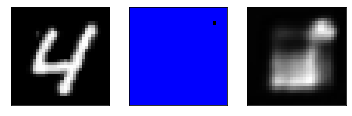

<Figure size 432x288 with 0 Axes>

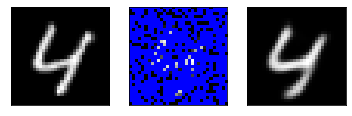

<Figure size 432x288 with 0 Axes>

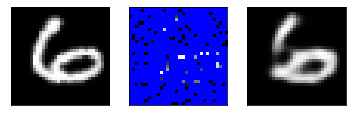

<Figure size 432x288 with 0 Axes>

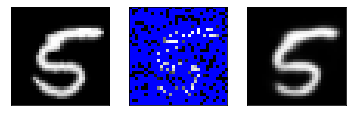

<Figure size 432x288 with 0 Axes>

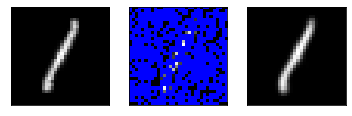

<Figure size 432x288 with 0 Axes>

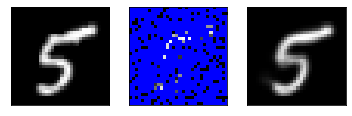

<Figure size 432x288 with 0 Axes>

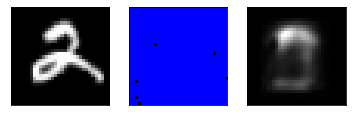

<Figure size 432x288 with 0 Axes>

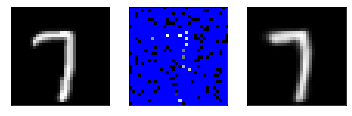

<Figure size 432x288 with 0 Axes>

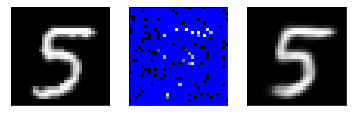

<Figure size 432x288 with 0 Axes>

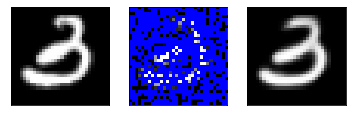

In [5]:
ConvCNP_mnist = GridConvCNP(1,1,11,9,5,2,128,4)
best_ConvCNP_mnist_path=train_2d(model = ConvCNP_mnist, model_name = "ConvCNP_2d_MNIST", train_loader=train_mnist_loader, 
                val_loader = val_mnist_loader, a = 0.0, b= 0.3, epochs=10, report_interval=100)